#Import danych

In [ ]:
import pandas as pd

In [ ]:
# wczytanie danych z pliku csv jako DataFrame
df = pd.read_csv('/content/products.csv')

# Przygotowanie danych

In [ ]:
# wstępny podgląd danych
df.head()

,ProductName,Ingredients,Rate,Price,Price_decimal,Review,BrandName
0,LaQ Kozioł,"\nAqua, Sodium Coco-Sulfate, Coco-Glucoside, C...",brak oceny,19,\n99\nzł\n,brak,\nLaQ\n
1,Chi Infra,"\nAqua/Water/Eau, Sodium C14-16 Olefin Sulfona...",5.0,49,\n99\nzł\n,\n(1 Opinia)\n,\nChi\n
2,Barwa Naturalna,"\nAqua,Sodium Laureth Sulfate,Cocamidopropyl B...",4.4,6,\n99\nzł\n,\n(80 Opinii)\n,\nBarwa\n
3,Alfaparf Semi Di Lino Reconstruction,"\nAqua/Water, Disodium Laureth Sulfosuccinate,...",brak oceny,53,\n51\nzł\n,brak,\nAlfaparf\n
4,Head&Shoulders Classic Clean,"\nAqua,Sodium Laureth Sulfate,Sodium Lauryl Su...",1.5,13,\n99\nzł\n,\n(2 Opinie)\n,brak


In [ ]:
# wyświetlenie informacji o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductName    882 non-null    object
 1   Ingredients    882 non-null    object
 2   Rate           882 non-null    object
 3   Price          882 non-null    int64 
 4   Price_decimal  882 non-null    object
 5   Review         882 non-null    object
 6   BrandName      882 non-null    object
dtypes: int64(1), object(6)
memory usage: 48.4+ KB


## Uporządkowanie danych z kolumny Rewiev

In [ ]:
# użycie modułu replace() do zamiany znaków
df['Review'].replace("\n", "", regex=True, inplace=True)
df['Review'].replace("\(", "", regex=True, inplace=True)
df['Review'].replace("\)", "", regex=True, inplace=True)
df['Review'].replace("Opinia", "", regex=True, inplace=True)
df['Review'].replace("Opinii", "", regex=True, inplace=True)
df['Review'].replace("Opinie", "", regex=True, inplace=True)

In [ ]:
df['Review'].unique()

array(['brak', '1 ', '80 ', '2 ', '4 ', '8 ', '14 ', '9 ', '12 ', '11 ',
       '6 ', '32 ', '5 ', '3 ', '112 ', '7 ', '22 ', '13 ', '18 ', '16 ',
       '10 ', '17 ', '29 ', '23 ', '81 ', '26 ', '19 ', '21 ', '60 ',
       '47 ', '27 ', '30 ', '39 ', '15 ', '67 ', '37 ', '55 ', '50 ',
       '56 ', '25 ', '54 ', '40 ', '20 ', '38 ', '75 ', '58 ', '34 ',
       '71 ', '28 ', '31 ', '46 ', '105 '], dtype=object)

In [ ]:
# zamiana wartości 'brak' na '0', zmiana na dane typu int
df['Review'].replace("brak", "0", inplace=True)
df['Review']=df['Review'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductName    882 non-null    object
 1   Ingredients    882 non-null    object
 2   Rate           882 non-null    object
 3   Price          882 non-null    int64 
 4   Price_decimal  882 non-null    object
 5   Review         882 non-null    int64 
 6   BrandName      882 non-null    object
dtypes: int64(2), object(5)
memory usage: 48.4+ KB


## Uporządkowanie danych z kolumny Price

In [ ]:
df['Price_decimal'].replace("\n", "", regex=True, inplace=True)
df['Price_decimal'].replace("zł", "", regex=True, inplace=True)
df['Price_decimal']=df['Price_decimal'].astype(int)


In [ ]:
# połączenie kolumn Price i Price decimal
df['Price'] = df['Price'] + df['Price_decimal']/100
df = df.drop(['Price_decimal'], axis=1)

In [ ]:
df

,ProductName,Ingredients,Rate,Price,Review,BrandName
0,LaQ Kozioł,"\nAqua, Sodium Coco-Sulfate, Coco-Glucoside, C...",brak oceny,19.99,0,\nLaQ\n
1,Chi Infra,"\nAqua/Water/Eau, Sodium C14-16 Olefin Sulfona...",5.0,49.99,1,\nChi\n
2,Barwa Naturalna,"\nAqua,Sodium Laureth Sulfate,Cocamidopropyl B...",4.4,6.99,80,\nBarwa\n
3,Alfaparf Semi Di Lino Reconstruction,"\nAqua/Water, Disodium Laureth Sulfosuccinate,...",brak oceny,53.51,0,\nAlfaparf\n
4,Head&Shoulders Classic Clean,"\nAqua,Sodium Laureth Sulfate,Sodium Lauryl Su...",1.5,13.99,2,brak
...,...,...,...,...,...,...
877,Hebe Cosmetics Volumizing Shampoo,"\nAqua, Sodium Coco-Sulfate, Decyl Glucoside, ...",4.3,14.99,18,\nHebe Cosmetics\n
878,Hebe Cosmetics Smoothing Shampoo,"\nAqua, Sodium Coco-Sulfate, Decyl Glucoside, ...",4.7,14.99,9,\nHebe Cosmetics\n
879,Radical,"\nAqua (Water), Sodium Laureth Sulfate, Cocami...",3.7,12.99,3,\nRadical\n
880,Green Garden,"\nulfate, ocamidopropyl Betaine, Coamide Dea, ...",brak oceny,29.00,0,\nGreen Garden\n


## Uporządkowanie danych z kolumny Ingredients

In [ ]:
# usunięcie zbędnych ciągów znaków, zamiana separatorów na ','
df['Ingredients'].replace("\n", "", regex=True, inplace=True)
df['Ingredients'] = df['Ingredients'].str.replace('Listy składników dla produktów naszej marki są regularnie aktualizowane. Zapoznaj się z listą składników na opakowaniu produktu, gdzie zawsze znajduje się najbardziej aktualna lista składników, aby upewnić się, że jest ona dla Ciebie odpowiednia.', '')
df['Ingredients'].replace("â€˘", ",", regex=True, inplace=True)
df['Ingredients'] = df['Ingredients'].str.replace('*', "")
df['Ingredients'] = df['Ingredients'].str.replace('?', "")
df['Ingredients'] = df['Ingredients'].str.replace('.', ",")
df['Ingredients'] = df['Ingredients'].str.replace('/', ",")
df['Ingredients'] = df['Ingredients'].str.replace(')', ",")
df['Ingredients'] = df['Ingredients'].str.replace('(', ",")

<ipython-input-41-4704c28fb96f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ingredients'] = df['Ingredients'].str.replace('Listy składników dla produktów naszej marki są regularnie aktualizowane. Zapoznaj się z listą składników na opakowaniu produktu, gdzie zawsze znajduje się najbardziej aktualna lista składników, aby upewnić się, że jest ona dla Ciebie odpowiednia.', '')
<ipython-input-41-4704c28fb96f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ingredients'] = df['Ingredients'].str.replace('*', "")
<ipython-input-41-4704c28fb96f>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ingredients'] = df['Ingr

In [ ]:
df

,ProductName,Ingredients,Rate,Price,Review,BrandName
0,LaQ Kozioł,"Aqua, Sodium Coco-Sulfate, Coco-Glucoside, Coc...",brak oceny,19.99,0,\nLaQ\n
1,Chi Infra,"Aqua,Water,Eau, Sodium C14-16 Olefin Sulfonate...",5.0,49.99,1,\nChi\n
2,Barwa Naturalna,"Aqua,Sodium Laureth Sulfate,Cocamidopropyl Bet...",4.4,6.99,80,\nBarwa\n
3,Alfaparf Semi Di Lino Reconstruction,"Aqua,Water, Disodium Laureth Sulfosuccinate, S...",brak oceny,53.51,0,\nAlfaparf\n
4,Head&Shoulders Classic Clean,"Aqua,Sodium Laureth Sulfate,Sodium Lauryl Sulf...",1.5,13.99,2,brak
...,...,...,...,...,...,...
877,Hebe Cosmetics Volumizing Shampoo,"Aqua, Sodium Coco-Sulfate, Decyl Glucoside, Co...",4.3,14.99,18,\nHebe Cosmetics\n
878,Hebe Cosmetics Smoothing Shampoo,"Aqua, Sodium Coco-Sulfate, Decyl Glucoside, Co...",4.7,14.99,9,\nHebe Cosmetics\n
879,Radical,"Aqua ,Water,, Sodium Laureth Sulfate, Cocamido...",3.7,12.99,3,\nRadical\n
880,Green Garden,"ulfate, ocamidopropyl Betaine, Coamide Dea, So...",brak oceny,29.00,0,\nGreen Garden\n


## Uporządkowanie danych z kolumny Rate

In [ ]:
# zliczenie wartości
df['Rate'].value_counts()

brak oceny    429
5.0           150
4.0            34
4.3            31
4.5            25
4.4            23
4.6            20
4.1            19
4.8            17
3.7            15
4.7            13
4.2            13
3.8            10
3.0            10
3.6             8
3.9             8
4.9             7
2.0             6
3.5             6
3.1             5
1.0             5
3.2             5
3.3             4
3.4             4
2.8             3
2.7             2
2.6             2
2.3             2
2.4             1
1.6             1
1.5             1
2.5             1
1.3             1
2.2             1
Name: Rate, dtype: int64

In [ ]:
df['Rate'].replace("brak oceny", "0", regex=True, inplace=True)
df['Rate']=df['Rate'].astype(float)
df.rename(columns={"Review": "Reviews"}, inplace=True)

## Uporządkowanie danych z kolumny BrandName

In [ ]:
df['BrandName'].replace("\n", "", regex=True, inplace=True)

## Stworzenie dodatkowej kolumny PriceRange z podziałem na kategorie cen

In [ ]:
df['PriceRange']=pd.cut(df['Price'],
                      bins=[0, 15, 30, 300],
                      labels=['low', 'medium', 'high'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductName  882 non-null    object  
 1   Ingredients  882 non-null    object  
 2   Rate         882 non-null    float64 
 3   Price        882 non-null    float64 
 4   Reviews      882 non-null    int64   
 5   BrandName    882 non-null    object  
 6   PriceRange   882 non-null    category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 42.5+ KB


In [61]:
df.to_csv('hebe_dane.csv', index=False, encoding='utf-8')

# Analiza danych 

##Pobranie potrzebnych bibliotek

In [ ]:
import pandas as pd
import seaborn as sns

## Wyświetlenie podstawowych informacji o zbiorze

In [ ]:
df.head()

,ProductName,Ingredients,Rate,Price,Reviews,BrandName,PriceRange
0,LaQ Kozioł,"Aqua, Sodium Coco-Sulfate, Coco-Glucoside, Coc...",0.0,19.99,0,LaQ,medium
1,Chi Infra,"Aqua,Water,Eau, Sodium C14-16 Olefin Sulfonate...",5.0,49.99,1,Chi,high
2,Barwa Naturalna,"Aqua,Sodium Laureth Sulfate,Cocamidopropyl Bet...",4.4,6.99,80,Barwa,low
3,Alfaparf Semi Di Lino Reconstruction,"Aqua,Water, Disodium Laureth Sulfosuccinate, S...",0.0,53.51,0,Alfaparf,high
4,Head&Shoulders Classic Clean,"Aqua,Sodium Laureth Sulfate,Sodium Lauryl Sulf...",1.5,13.99,2,brak,low


In [ ]:
df.tail()

,ProductName,Ingredients,Rate,Price,Reviews,BrandName,PriceRange
877,Hebe Cosmetics Volumizing Shampoo,"Aqua, Sodium Coco-Sulfate, Decyl Glucoside, Co...",4.3,14.99,18,Hebe Cosmetics,low
878,Hebe Cosmetics Smoothing Shampoo,"Aqua, Sodium Coco-Sulfate, Decyl Glucoside, Co...",4.7,14.99,9,Hebe Cosmetics,low
879,Radical,"Aqua ,Water,, Sodium Laureth Sulfate, Cocamido...",3.7,12.99,3,Radical,low
880,Green Garden,"ulfate, ocamidopropyl Betaine, Coamide Dea, So...",0.0,29.00,0,Green Garden,medium
881,Joanna Naturia,"Aqua,Sodium Laureth Sulfate,Cocamidopropyl Bet...",0.0,7.99,0,Joanna,low


In [ ]:
df.sample(n=5, random_state=123)

,ProductName,Ingredients,Rate,Price,Reviews,BrandName,PriceRange
691,L'Oréal Professionnel Metal Detox,"Aqua, Water, EauSodium Cocoyl IsethionateDisod...",0.0,93.70,0,L'Oréal Professionnel,high
794,Marc Anthony Colour Care,"Aqua,Water,Eau,Sodium C14-16 Olefin Sulfonate,...",4.1,41.99,9,Marc Anthony,high
345,Syoss Keratin,"Aqua ,Water, Eau,,Sodium Laureth Sulfate,Cocam...",0.0,29.99,0,Syoss,medium
879,Radical,"Aqua ,Water,, Sodium Laureth Sulfate, Cocamido...",3.7,12.99,3,Radical,low
470,Bambino Dzieciaki,"Aqua, Cocamidopropyl Betaine, Sodium Myreth Su...",0.0,27.99,0,Bambino,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductName  882 non-null    object  
 1   Ingredients  882 non-null    object  
 2   Rate         882 non-null    float64 
 3   Price        882 non-null    float64 
 4   Reviews      882 non-null    int64   
 5   BrandName    882 non-null    object  
 6   PriceRange   882 non-null    category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 42.5+ KB


In [ ]:
df.describe()

,Rate,Price,Reviews
count,882.000000,882.000000,882.000000
mean,2.210204,41.255737,5.256236
std,2.227470,32.267531,11.471135
min,0.000000,3.990000,0.000000
25%,0.000000,18.990000,0.000000
50%,2.000000,32.990000,1.000000
75%,4.500000,54.990000,5.750000
max,5.000000,250.000000,112.000000


##Top 10 marek produktów

In [ ]:
dfv = df.loc[df["BrandName"] != 'brak' ]
top_ten_brands=dfv['BrandName'].value_counts(dropna=False, normalize=True)[:10].index.tolist()

#Wizualizacja danych

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,8)})

Text(0.5, 0, 'Top Ten Brands Avg Rates')

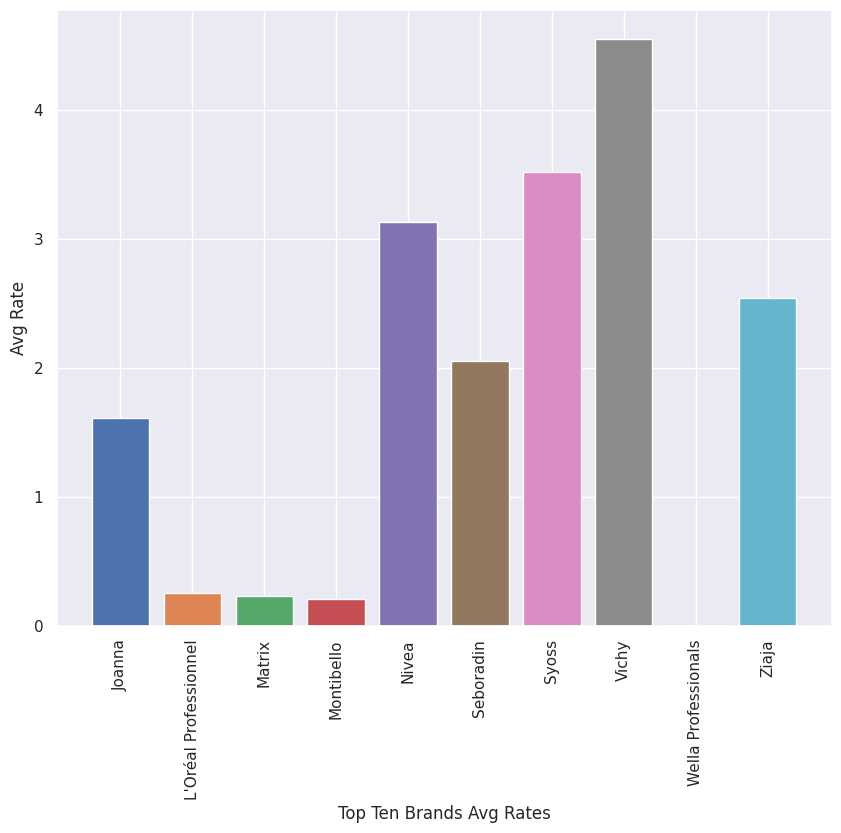

In [ ]:
df_top_brands=dfv.loc[dfv['BrandName'].isin(top_ten_brands)]
for brand_1, df_brand_1 in df_top_brands.groupby('BrandName'):
    avg_rates=df_brand_1.Rate.mean()
    plt.bar(brand_1, height=avg_rates)
plt.xticks(rotation=90)
plt.ylabel('Avg Rate')
plt.xlabel('Top Ten Brands Avg Rates')

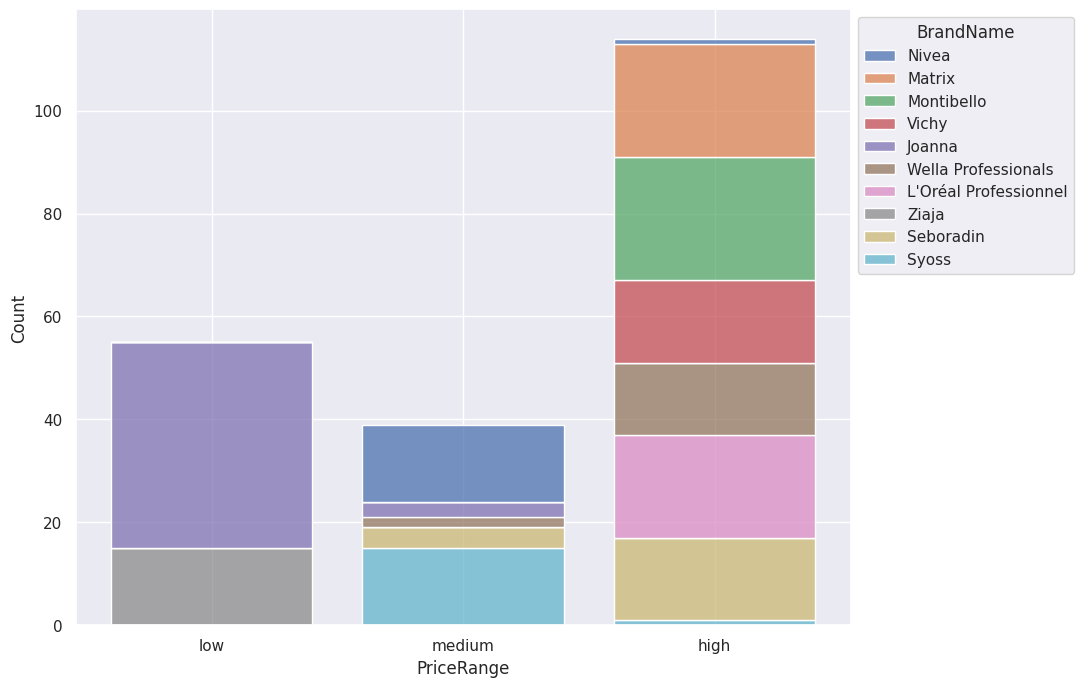

In [ ]:
ax = sns.histplot(x='PriceRange', data=df_top_brands, hue='BrandName', multiple='stack', shrink=0.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))